# Preprocesssing with Sklearn pipelines

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Estimate weight of car 

# Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Step 2 - Perform basic data quality checks

In [3]:
df.shape

(94, 28)

In [4]:
df.duplicated().sum()

np.int64(1)

In [5]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(93, 28)

In [6]:
m = df.isna().sum()
m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [7]:
m[m > 0] / len(df)

AirBags           0.043011
Rear.seat.room    0.021505
Luggage.room      0.118280
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [9]:
c = df.select_dtypes(include="object").nunique()
c

Manufacturer       32
Model              93
Type                6
AirBags             3
DriveTrain          3
Cylinders           6
Man.trans.avail     2
Origin              2
Make               93
dtype: int64

In [10]:
cardianlity = c / len(df)
cardianlity

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64

In [11]:
high_card_cols = cardianlity[cardianlity >= 0.9].index
high_card_cols

Index(['Model', 'Make'], dtype='object')

In [13]:
df = df.drop(columns = high_card_cols)
df.head()

,id,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,1,Acura,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,2,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,3,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,4,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,5,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


# Step 3 - Seperate X and Y(Weight)
id dropped becuase it is a serial no. Statistically insignificant

In [15]:
X = df.drop(columns=["id", "Weight"])
Y = df["Weight"]

In [16]:
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,...,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA


In [17]:
Y.head()

0    2705
1    3560
2    3375
3    3405
4    3640
Name: Weight, dtype: int64

# Step 4 - Apply Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=21)

In [19]:
xtrain.shape

(74, 24)

In [20]:
xtest.shape

(19, 24)

In [21]:
xtrain.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
57,Mercedes-Benz,Compact,29.0,31.9,34.9,20,29,Driver only,Rear,4,...,Yes,14.5,5,175,105,67,34,26.0,12.0,non-USA
31,Ford,Small,8.4,10.1,11.9,23,30,None,Front,4,...,Yes,13.2,5,171,98,67,36,28.0,12.0,USA
62,Mitsubishi,Midsize,22.4,26.1,29.9,18,24,Driver only,Front,6,...,No,19.0,5,190,107,70,43,27.5,14.0,non-USA
29,Eagle,Large,17.5,19.3,21.2,20,28,Driver & Passenger,Front,6,...,No,18.0,6,202,113,74,40,30.0,15.0,USA
51,Lincoln,Large,34.4,36.1,37.8,18,26,NaN,Rear,8,...,No,20.0,6,219,117,77,45,31.5,22.0,USA


In [22]:
ytrain.head()

57    2920
31    2530
62    3730
29    3490
51    4055
Name: Weight, dtype: int64

In [23]:
xtest.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
23,Dodge,Small,8.4,11.3,14.2,23,29,Driver only,Front,4,...,Yes,14.0,5,172,97,67,38,26.5,13.0,USA
86,Toyota,Van,18.9,22.7,26.6,18,22,Driver only,4WD,4,...,Yes,19.8,7,187,113,71,41,35.0,NaN,non-USA
91,Volvo,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,...,Yes,15.8,5,190,104,67,37,29.5,14.0,non-USA
21,Chrysler,Large,29.5,29.5,29.5,20,26,NaN,Front,6,...,No,16.0,6,203,110,69,44,36.0,17.0,USA
17,Chevrolet,Large,18.0,18.8,19.6,17,26,Driver only,Rear,8,...,No,23.0,6,214,116,77,42,29.5,20.0,USA


In [24]:
ytest.head()

23    2670
86    3785
91    2985
21    3570
17    3910
Name: Weight, dtype: int64

# Step 5 - Build prpeprocessing pipeline for X

In [25]:
from sklearn.pipeline import make_pipeline # To combine preprocessing steps
from sklearn.impute import SimpleImputer # To replace missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Preprocessing
from sklearn.compose import ColumnTransformer # Combine num_pipe and cat_pipe

In [26]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [27]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [28]:
cat_cols = xtrain.select_dtypes(include="object").columns.tolist()
cat_cols

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [29]:
num_cols = xtrain.select_dtypes(include="number").columns.tolist()
num_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [30]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [31]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__AirBags_None,cat__DriveTrain_Front,cat__DriveTrain_Rear,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Man.trans.avail_Yes,cat__Origin_non-USA
57,1.379291,1.306577,1.202687,-0.434260,-0.030001,-0.328630,-0.235048,-0.284639,0.216848,-0.645123,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
31,-0.964996,-0.932635,-0.858508,0.104319,0.155004,-0.803603,-0.295372,2.001296,0.185425,-1.039911,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,0.628209,0.710823,0.754601,-0.793313,-0.955024,0.336332,1.212737,1.184891,-0.233550,0.721454,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,0.070587,0.012354,-0.025069,-0.434260,-0.215005,0.811305,1.454035,0.858329,-0.715371,0.417770,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51,1.993812,1.737984,1.462577,-0.793313,-0.585015,1.856246,1.373602,-1.101044,-1.008653,1.025138,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__AirBags_None,cat__DriveTrain_Front,cat__DriveTrain_Rear,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Man.trans.avail_Yes,cat__Origin_non-USA
23,-0.964996,-0.809375,-0.652389,0.104319,-0.030001,-0.423625,-0.979048,-0.774482,0.572976,-0.796964,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.229907,0.361588,0.458864,-0.793313,-1.325033,-0.233635,-0.074183,-0.447920,0.405386,0.964401,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
91,0.559928,0.361588,0.181051,-0.254734,-0.215005,-0.328630,-0.556778,0.205205,-0.223076,-0.250334,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
21,1.436191,1.060058,0.718754,-0.434260,-0.585015,0.621316,0.106790,-0.774482,-1.123871,-0.189597,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17,0.127487,-0.039004,-0.168456,-0.972840,-0.585015,2.236224,0.569277,-1.754168,-2.035140,1.936189,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Preprocessing complete

# Step 6 - Build the model

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain_pre, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model.intercept_

np.float64(3490.3390164326615)

In [35]:
model.coef_

array([ 7.20419598e+03, -1.56620480e+04,  9.03085143e+03,  4.82511435e+00,
       -1.99822731e+02, -1.75883950e+02,  2.09347456e+02, -1.04664237e+02,
       -9.50728677e+01, -7.24003502e+01, -1.91410692e+01,  1.23676458e+02,
        1.38281012e+02,  1.49315026e+02, -2.81692418e+01, -4.35033498e+01,
        1.20835407e+02, -2.01513491e+01,  4.04596835e+02, -1.97945393e+02,
       -6.97668997e+01,  1.71517277e+01, -1.21584560e+01, -3.35594665e+01,
       -2.29798162e+01,  1.21888306e+00,  3.27949076e+02,  5.42938932e+01,
        1.21927371e+02, -1.29106149e+02,  1.24418477e+02, -2.15580329e+02,
       -9.78906465e+01, -7.10733647e+02,  4.61183054e+00, -3.41245749e+01,
       -4.38270063e+01, -1.64785135e+02,  4.79299766e+02,  6.99084830e+01,
       -4.54286976e+02,  1.35072002e+01,  1.15152443e+01, -8.92249606e+01,
        1.12796202e+02,  5.08147297e+01, -2.60151113e+02, -2.25059681e+02,
        3.36268225e+01, -2.17844680e+02,  2.24688525e+02,  1.51606928e+02,
        4.19948335e+01,  

In [36]:
coef = pd.Series(model.coef_, index=xtrain_pre.columns)
coef

num__Min.Price               7204.195984
num__Price                 -15662.048038
num__Max.Price               9030.851433
num__MPG.city                   4.825114
num__MPG.highway             -199.822731
                                ...     
cat__Cylinders_6             -504.820132
cat__Cylinders_8             -893.778904
cat__Cylinders_rotary       -1141.283882
cat__Man.trans.avail_Yes     -165.132247
cat__Origin_non-USA           131.077605
Length: 62, dtype: float64

# Step 7 - Model Evaluation

In [37]:
# R2 score on train
model.score(xtrain_pre, ytrain)

0.9960160568027507

In [39]:
# R2 score on test
model.score(xtest_pre, ytest)

0.8704792501215555

In [40]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [41]:
print("Train Results : ")
evaluate_model(model, xtrain_pre, ytrain)

Train Results : 
RMSE : 36.61
MAE : 24.36
MAPE : 0.84%
R2 : 99.60%


In [42]:
print("Test Results :")
evaluate_model(model, xtest_pre, ytest)

Test Results :
RMSE : 216.74
MAE : 175.60
MAPE : 5.42%
R2 : 87.05%


<Axes: xlabel='Weight'>

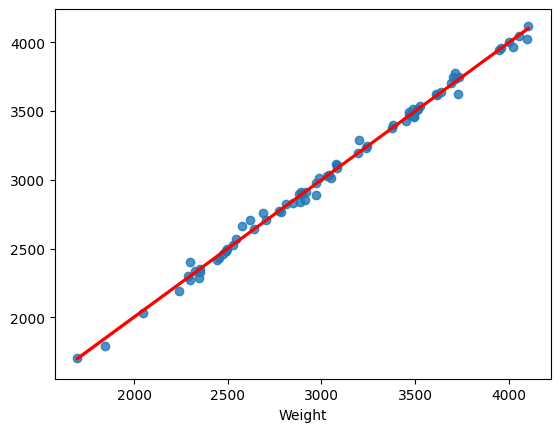

In [45]:
import seaborn as sns
ypred_train = model.predict(xtrain_pre)
sns.regplot(x=ytrain, y=ypred_train, line_kws={"color": "red"})

<Axes: ylabel='Count'>

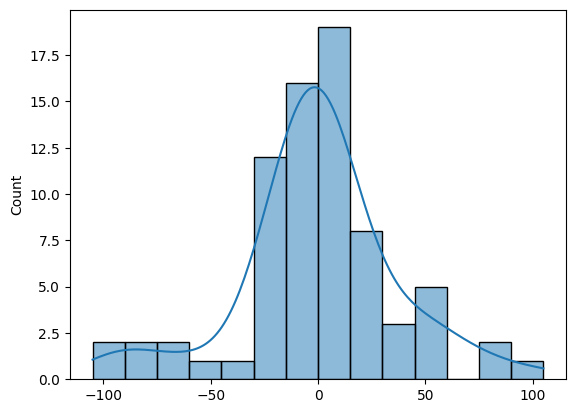

In [50]:
res_train = ytrain.values - ypred_train
sns.histplot(res_train, kde=True)

<Axes: xlabel='Weight'>

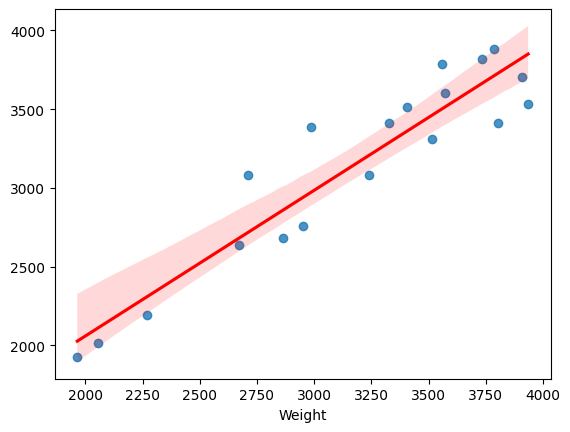

In [46]:
ypred_test = model.predict(xtest_pre)

sns.regplot(x=ytest, y=ypred_test, line_kws = {"color": "red"})

In [47]:
res_test = ytest.values - ypred_test
res_test[0:5]

array([  32.56043264,  -94.78720808, -399.16624447,  -35.61909043,
        205.09160701])

<Axes: ylabel='Count'>

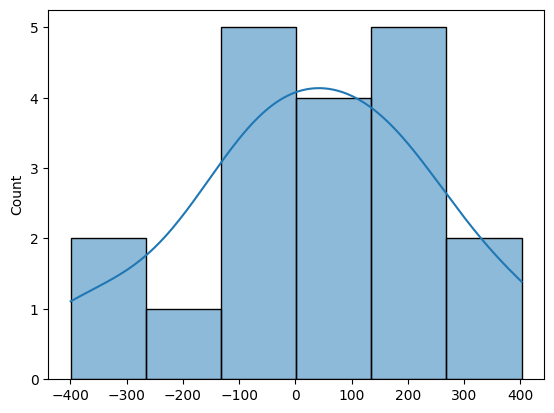

In [49]:
sns.histplot(res_test, kde=True)

# Step 8 - Out of sample prediction

In [51]:
xnew = pd.read_csv("sample.csv", na_values = ["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [52]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [53]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__AirBags_None,cat__DriveTrain_Front,cat__DriveTrain_Rear,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Man.trans.avail_Yes,cat__Origin_non-USA
0,1.584131,1.902330,2.071974,-0.613787,-0.585015,0.146343,0.609493,0.368486,0.447284,-0.493281,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,-0.851196,-0.829918,-0.777853,0.104319,0.340009,-0.613614,-0.637210,-0.121358,0.719617,-0.432544,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.395994,-0.336881,-0.275997,-0.254734,-0.030001,-0.423625,-0.637210,-0.121358,0.572976,-0.037755,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.777592,1.368206,0.987606,-0.972840,-0.770019,-1.278576,2.278468,2.001296,0.007360,1.025138,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-0.930856,-1.035351,-1.073590,0.463373,0.710018,-0.803603,-1.220346,0.368486,0.478707,-1.282858,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [54]:
preds = model.predict(xnew_pre)
preds

array([3429.81023978, 2665.59404694, 3197.49839258, 2895.        ,
       2195.15784382])

In [55]:
xnew["Weight_pred"] = preds.round(2)

In [57]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3429.81
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2665.59
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3197.50
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.00
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2195.16


In [58]:
xnew.to_csv("results.csv", index=False)

# Step 9 - Save pre and model object

In [59]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [60]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
import joblib
joblib.dump(pre, "cars_pre.joblib")

['cars_pre.joblib']

In [62]:
joblib.dump(model, "weight_model.joblib")

['weight_model.joblib']

# Load the model object

In [63]:
p = joblib.load("cars_pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [64]:
m = joblib.load("weight_model.joblib")
m

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
m.score(xtrain_pre, ytrain)

0.9960160568027507

In [66]:
m.score(xtest_pre, ytest)

0.8704792501215555